#  Caso de estudio Bella beat! 

### Preguntas
Se tiene como objetivo encontrar las tendencias en el uso de dispositivos inteligentes y utilizar esta informacion para ayudar a influir en su estrategia de marketing.

Estas son las principales interrogantes del analisis:

¿Cuáles son algunas tendencias en el uso de dispositivos inteligentes?

¿Cómo podrían aplicarse estas tendencias a los clientes de Bellabeat?

¿Cómo podrían ayudar estas tendencias a influir en la estrategia de marketing de Bellabeat?

### Fuente de datos
Los datos utilizados en este caso de estudio son publicos en la plataforma Kaggle.

In [263]:
#importar librerias necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [100]:
#cargar datos
activity = pd.read_csv('Fitabase Data/dailyActivity_merged.csv')
calories = pd.read_csv('Fitabase Data/hourlyCalories_merged.csv')
intensities = pd.read_csv('Fitabase Data/hourlyIntensities_merged.csv')
sleep = pd.read_csv('Fitabase Data/sleepDay_merged.csv')
weight  = pd.read_csv('Fitabase Data/weightLogInfo_merged.csv')

In [27]:
activity.dtypes

Id                            int64
ActivityDate                 object
TotalSteps                    int64
TotalDistance               float64
TrackerDistance             float64
LoggedActivitiesDistance    float64
VeryActiveDistance          float64
ModeratelyActiveDistance    float64
LightActiveDistance         float64
SedentaryActiveDistance     float64
VeryActiveMinutes             int64
FairlyActiveMinutes           int64
LightlyActiveMinutes          int64
SedentaryMinutes              int64
Calories                      int64
dtype: object

In [29]:
activity.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


In [31]:
calories.dtypes

Id               int64
ActivityHour    object
Calories         int64
dtype: object

In [73]:
calories.head()

,Id,ActivityHour,Calories
0,1503960366,4/12/2016 12:00:00 AM,81
1,1503960366,4/12/2016 1:00:00 AM,61
2,1503960366,4/12/2016 2:00:00 AM,59
3,1503960366,4/12/2016 3:00:00 AM,47
4,1503960366,4/12/2016 4:00:00 AM,48


In [35]:
intensities.dtypes

Id                    int64
ActivityHour         object
TotalIntensity        int64
AverageIntensity    float64
dtype: object

In [37]:
intensities.head()

,Id,ActivityHour,TotalIntensity,AverageIntensity
0,1503960366,4/12/2016 12:00:00 AM,20,0.333333
1,1503960366,4/12/2016 1:00:00 AM,8,0.133333
2,1503960366,4/12/2016 2:00:00 AM,7,0.116667
3,1503960366,4/12/2016 3:00:00 AM,0,0.000000
4,1503960366,4/12/2016 4:00:00 AM,0,0.000000


In [50]:
sleep.dtypes

Id                     int64
SleepDay              object
TotalSleepRecords      int64
TotalMinutesAsleep     int64
TotalTimeInBed         int64
dtype: object

In [51]:
sleep.head()

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,4/12/2016 12:00:00 AM,1,327,346
1,1503960366,4/13/2016 12:00:00 AM,2,384,407
2,1503960366,4/15/2016 12:00:00 AM,1,412,442
3,1503960366,4/16/2016 12:00:00 AM,2,340,367
4,1503960366,4/17/2016 12:00:00 AM,1,700,712


In [42]:
weight.dtypes

Id                  int64
Date               object
WeightKg          float64
WeightPounds      float64
Fat               float64
BMI               float64
IsManualReport       bool
LogId               int64
dtype: object

In [45]:
weight.head()

,Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
0,1503960366,5/2/2016 11:59:59 PM,52.599998,115.963147,22.0,22.650000,True,1462233599000
1,1503960366,5/3/2016 11:59:59 PM,52.599998,115.963147,NaN,22.650000,True,1462319999000
2,1927972279,4/13/2016 1:08:52 AM,133.500000,294.317120,NaN,47.540001,False,1460509732000
3,2873212765,4/21/2016 11:59:59 PM,56.700001,125.002104,NaN,21.450001,True,1461283199000
4,2873212765,5/12/2016 11:59:59 PM,57.299999,126.324875,NaN,21.690001,True,1463097599000


In [101]:
#examinar si hay duplicados y eliminarlos
print(activity.duplicated().sum())
print(calories.duplicated().sum())
print(sleep.duplicated().sum())
print(intensities.duplicated().sum())
print(weight.duplicated().sum())


0
0
3
0
0


In [102]:
#eliminar filas duplicadas
sleep = sleep.drop_duplicates()

In [103]:
#verificar valores nulos
print(sleep.isnull().sum(), '\n')
print(calories.isnull().sum(), '\n')
print(activity.isnull().sum(), '\n')
print(weight.isnull().sum(), '\n')
print(intensities.isnull().sum(), '\n')

Id                    0
SleepDay              0
TotalSleepRecords     0
TotalMinutesAsleep    0
TotalTimeInBed        0
dtype: int64 

Id              0
ActivityHour    0
Calories        0
dtype: int64 

Id                          0
ActivityDate                0
TotalSteps                  0
TotalDistance               0
TrackerDistance             0
LoggedActivitiesDistance    0
VeryActiveDistance          0
ModeratelyActiveDistance    0
LightActiveDistance         0
SedentaryActiveDistance     0
VeryActiveMinutes           0
FairlyActiveMinutes         0
LightlyActiveMinutes        0
SedentaryMinutes            0
Calories                    0
dtype: int64 

Id                 0
Date               0
WeightKg           0
WeightPounds       0
Fat               65
BMI                0
IsManualReport     0
LogId              0
dtype: int64 

Id                  0
ActivityHour        0
TotalIntensity      0
AverageIntensity    0
dtype: int64 



In [126]:
#formato de fecha
activity['ActivityDate'] = pd.to_datetime(activity['ActivityDate'], format='%m/%d/%Y')
calories['ActivityHour'] = pd.to_datetime(calories['ActivityHour'], format='%m/%d/%Y %I:%M:%S %p')
intensities['ActivityHour'] = pd.to_datetime(intensities['ActivityHour'], format='%m/%d/%Y %I:%M:%S %p')
sleep['SleepDay'] = pd.to_datetime(sleep['SleepDay'], format='%m/%d/%Y %I:%M:%S %p')
weight['Date'] = pd.to_datetime(weight['Date'], format='%m/%d/%Y %I:%M:%S %p')


In [144]:
s

Id                          4.855407e+09
TotalSteps                  7.637911e+03
TotalDistance               5.489702e+00
TrackerDistance             5.475351e+00
LoggedActivitiesDistance    1.081709e-01
VeryActiveDistance          1.502681e+00
ModeratelyActiveDistance    5.675426e-01
LightActiveDistance         3.340819e+00
SedentaryActiveDistance     1.606383e-03
VeryActiveMinutes           2.116489e+01
FairlyActiveMinutes         1.356489e+01
LightlyActiveMinutes        1.928128e+02
SedentaryMinutes            9.912106e+02
Calories                    2.303610e+03
dtype: float64

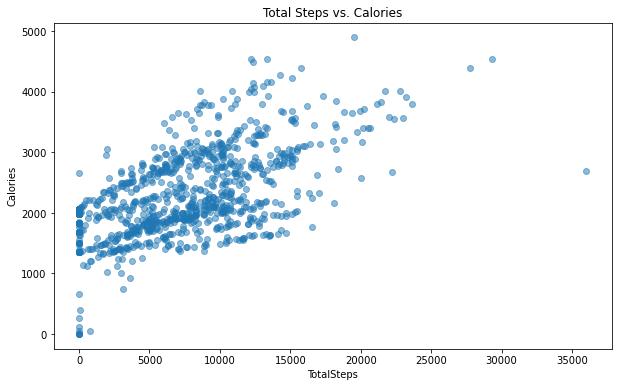

In [122]:
plt.figure(figsize=(10,6))
plt.scatter(activity['TotalSteps'], activity['Calories'], alpha=0.5)#(x,y)
plt.title('Total Steps vs. Calories')
plt.ylabel('Calories')
plt.xlabel('TotalSteps')
plt.show()

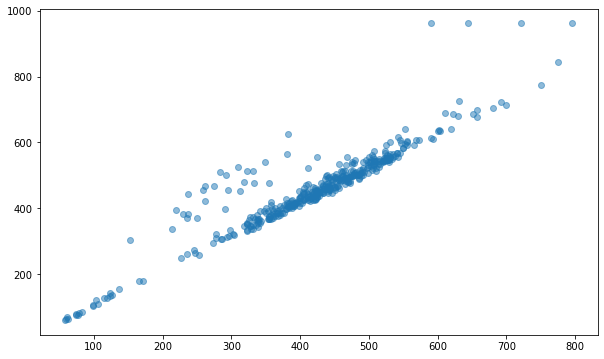

In [125]:
plt.figure(figsize=(10,6))
plt.scatter(sleep['TotalMinutesAsleep'], sleep['TotalTimeInBed'], alpha=0.5)
plt.show()

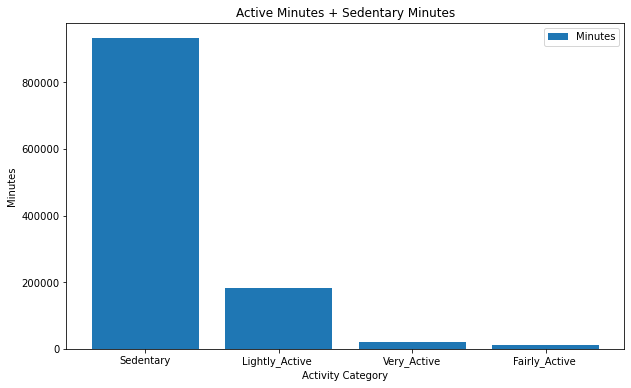

In [155]:
x=['Sedentary', 'Lightly_Active ', 'Very_Active', 'Fairly_Active ']
y=[activity['SedentaryMinutes'].sum(), activity['LightlyActiveMinutes'].sum(),activity['VeryActiveMinutes'].sum(), activity['FairlyActiveMinutes'].sum()]
plt.figure(figsize=(10,6))
plt.bar(x, y, label='Minutes')
plt.title('Active Minutes + Sedentary Minutes')
plt.ylabel('Minutes')
plt.xlabel('Activity Category')
plt.legend()
plt.show()

In [281]:
intensities['dates'] = pd.to_datetime(intensities['ActivityHour']).dt.date
intensities['time'] = pd.to_datetime(intensities['ActivityHour']).dt.time

df = intensities.groupby(['time'])['TotalIntensity'].mean()
k=df.keys()
df2 = df.to_frame()
df2['times']=k


df2['times'] = pd.to_datetime(df2['times'].astype(str))






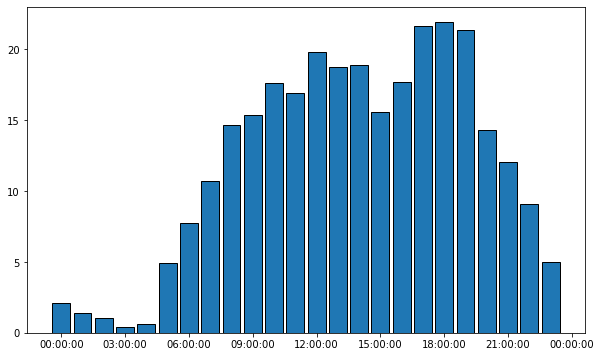

In [305]:
plt.figure(figsize=(10,6))
plt.bar(df2['times'], df2['TotalIntensity'], edgecolor='black', width=0.035)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))
plt.show()


In [292]:
df

time
00:00:00     2.129550
01:00:00     1.419078
02:00:00     1.043944
03:00:00     0.443730
04:00:00     0.633047
05:00:00     4.950644
06:00:00     7.771214
07:00:00    10.733620
08:00:00    14.668099
09:00:00    15.387755
10:00:00    17.643703
11:00:00    16.921251
12:00:00    19.847072
13:00:00    18.775244
14:00:00    18.868621
15:00:00    15.584699
16:00:00    17.716648
17:00:00    21.655629
18:00:00    21.921634
19:00:00    21.385210
20:00:00    14.339956
21:00:00    12.072928
22:00:00     9.063053
23:00:00     4.996678
Name: TotalIntensity, dtype: float64